In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [31]:
learning_rate = 0.001
trainning_steps = 100000
display_step = 5000

In [32]:
data = np.loadtxt("parsed_alldata_np.csv", delimiter = ',', dtype = np.float32)

X = data[:, :10]
Y = data[:, [-1]]

In [33]:
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())

In [34]:
def compute_loss():
    y_pred = a * X ** 2 + b * X + c
    loss = tf.reduce_mean((Y - y_pred) ** 2)
    return loss

In [35]:
optimizer = tf.optimizers.Adam(lr = learning_rate)

In [36]:
for step in range(1, trainning_steps + 1):
    optimizer.minimize(compute_loss, var_list = [a, b, c])
    
    if step % display_step == 0:
        print(step, 'a:', a.numpy(), 'b:', b.numpy(), 'c:', c.numpy(), 'loss:', compute_loss().numpy())

5000 a: -0.0010541894 b: 0.78380513 c: 4.4905777 loss: 1823.2966
10000 a: -0.0009732841 b: 0.7236288 c: 9.307615 loss: 1555.0162
15000 a: -0.00089027866 b: 0.66244286 c: 14.218969 loss: 1303.6177
20000 a: -0.000808854 b: 0.6013675 c: 19.122658 loss: 1074.9056
25000 a: -0.00070025405 b: 0.5404228 c: 24.016891 loss: 870.99335
30000 a: -0.00064384186 b: 0.47962487 c: 28.897402 loss: 685.47565
35000 a: -0.0005636594 b: 0.41896853 c: 33.764122 loss: 524.5838
40000 a: -0.00048220094 b: 0.35860702 c: 38.608776 loss: 386.22263
45000 a: -0.00040193697 b: 0.29865274 c: 43.42564 loss: 270.213
50000 a: -0.00032199774 b: 0.23913841 c: 48.204025 loss: 176.37
55000 a: -0.00024286125 b: 0.180371 c: 52.921387 loss: 104.47612
60000 a: -0.00016578018 b: 0.122897424 c: 57.534428 loss: 54.110973
65000 a: -8.866437e-05 b: 0.0680375 c: 61.932865 loss: 24.480719
70000 a: -1.1054133e-05 b: 0.021306459 c: 65.67815 loss: 14.2937155
75000 a: -9.659323e-06 b: 0.004540165 c: 66.99702 loss: 12.530277
80000 a: -6.128

In [37]:
XX = range(1, 1430 + 1)

In [38]:
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x * line_x + b * line_x + c

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

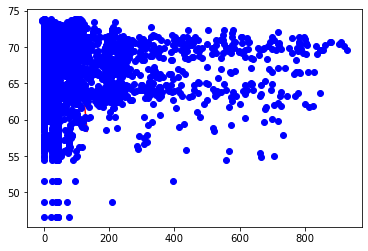

In [43]:
plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')
plt.show()

In [40]:
def rmse(X, Y):
    y_hat = a * line_x * line_x + b * line_x + c
    error = y_hat - Y
    mse = np.mean(error * error)
    rmse = np.sqrt(mse)
    
    return rmse

In [41]:
print(rmse(X, Y))

3.5422347
